## 0) Import some libraries

In [3]:
#the very standard libs
import pandas as pd
import numpy as np
import time

# tensorflow and scikit libraries to play with neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, LeakyReLU

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
# from tensorflow.keras.optimizers import RMSprop, Adam
# from tensorflow.keras.layers import BatchNormalization
# import tensorflow.keras.backend as K
# from tensorflow.keras.datasets import mnist

# use matplotlib to get nice graphs...
import matplotlib.pyplot as plt

# to get dynamlc plots
from IPython import display

## 1) let's define some functions to work with 

In [4]:
# define an array of "x" values and a corrresponding array of 'y' calculated from x
x1, y1 = [0, 1], [1, 0] # the "NO" function. answer is the input opposite...
x2, y2 = [0, 1], [0.5, 0.5] # the "neutral" function...
x3, y3 = [0, 1], [0, 1] # the "yes sir" function...

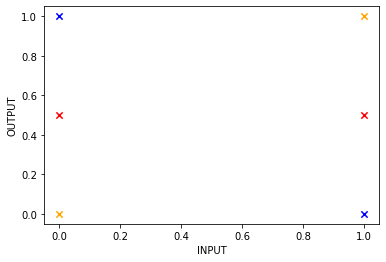

In [5]:
plt.scatter(x1, y1, marker = 'x', s=40, c = 'blue');
plt.scatter(x2, y2, marker = 'x', s=40, c = 'red');
plt.scatter(x3, y3, marker = 'x', s=40, c = 'orange');
plt.xlabel('INPUT');
plt.ylabel('OUTPUT');
# plt.scatter(x4, y4, marker = 'x', s=0.1, c = 'grey');

*** xy dataframe:
    x  y
0  0  1
1  1  0

*** xy.info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       2 non-null      int64
 1   y       2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes

*** xy.describe():
               x         y
count  2.000000  2.000000
mean   0.500000  0.500000
std    0.707107  0.707107
min    0.000000  0.000000
25%    0.250000  0.250000
50%    0.500000  0.500000
75%    0.750000  0.750000
max    1.000000  1.000000


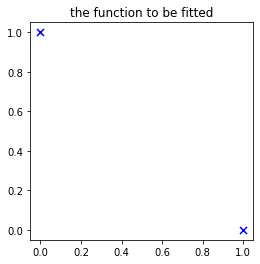

In [21]:
#select the y array to be fiited , get some info and plot the function
x = x1
y = y1

xy = pd.DataFrame({'x': x, 'y': y})
print('*** xy dataframe:\n', xy)
print('\n*** xy.info():\n')
xy.info()
print('\n*** xy.describe():\n', xy.describe())

#plot xy
plt.figure(figsize =(4, 4))
plt.title('the function to be fitted')
plt.scatter(x, y, marker = 'x', s = 50, c = 'blue');


## 2) Design the Neural Network model

In [22]:
# function to design the neural network model
# here we can play with the layer number, neuron number per layer, activation function type
# and also the learning rate, the loss metric

def nn_model():
    #following line to clear/reset the model
    tf.keras.backend.clear_session()

    my_model = Sequential()
    #input layer
    my_model.add(Dense(1, input_dim = 1, activation = 'sigmoid',use_bias=True,
#                        bias_initializer="ones", #optional. can be "zeros"
                       kernel_initializer="glorot_uniform",
                      ))

    #hidden layers (optional)
#     my_model.add(Dense(32, activation = 'relu'))
#     my_model.add(Dense(32, activation = 'sigmoid'))
#     my_model.add(Dense(25, activation = 'relu'))
#     my_model.add(Dense(32, activation = 'relu'))
#     my_model.add(Dense(32, activation = 'sigmoid'))
#     my_model.add(Dense(32, activation = 'sigmoid'))
#     my_model.add(Dense(10, activation = 'sigmoid'))
#     my_model.add(Dense(32, activation = 'relu'))

    #output layer
#     my_model.add(Dense(1, activation = 'linear'))

    #select the optimizer and define the learning rate
    opt = keras.optimizers.Adam(learning_rate = 0.03)
#     opt = keras.optimizers.RMSprop(learning_rate = 0.03)

    # define the loss function and optimization metrics
    my_model.compile(loss='mean_squared_error', metrics = ['mse', 'mean_absolute_error', 'mean_absolute_percentage_error'], optimizer = opt)

    # Display model architecture summary 

    return my_model

In [23]:
#function to return sigmoid(z)
def zf(z):
    return 1 / (1 + np.exp(-z))
#function to return some model output
def neur1(_model, x0, x1, p):
    _xy = np.array([x0, x1])
    _v = _xy * _model.get_weights()[0][0][0] + _model.get_weights()[1][0]
    _v_out = zf(_v)
    if p: print('w, b',_model.get_weights()[0][0][0],_model.get_weights()[1][0],'\nz=',_v,'\ng(z)=', _v_out)
    return _v, _v_out
def neur1_val(_model, x0, x1, exp0, exp1, *p):
    _expxy = np.array([exp0, exp1])
    _xy = np.array([x0, x1])
    _wg = np.array([_model.get_weights()[0][0][0], _model.get_weights()[1][0]])
    _v = _xy * _wg[0] + _wg[1]
    _v_out = zf(_v)
    _rmse = np.mean(abs(_v_out - [exp0,exp1]))
    _mse = np.mean((_v_out - [exp0 , exp1])**2)
    if p: print('[x1,x0]', '[w, b]','[z0, z1]', '[g(z0), g(z1)]', 'mse')

    return _xy, _wg, _v, _v_out, _mse, _expxy


### set "my_model" and plot the results

In [24]:
#assign a model to "my model", print summary
my_model = nn_model()
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [25]:
# to look at weight and bias
for i in my_model.trainable_variables:
    print (i)
my_model.get_weights()
my_model.get_weights()[0][0][0], my_model.get_weights()[1][0]

<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32>
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32>


(0.23530686, 0.0)

In [26]:
#lets initiate the model (no training cycle yet)
y_pred = my_model.predict(xy.x)

#define xy_pred as the output of the model
xy_pred = pd.DataFrame({'x': xy.x, 'y': xy.y, 'y_pred':y_pred.reshape(y_pred.shape[0],)})

In [27]:
xy_pred

,x,y,y_pred
0,0,1,0.500000
1,1,0,0.558557


In [28]:
xy_pred.y_pred[0], xy_pred.y_pred[1]

(0.5, 0.5585568)

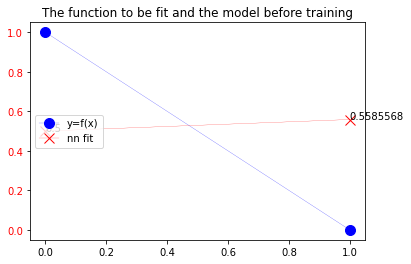

In [29]:
#let's plot the y and predicted at start...
plt.title('The function to be fit and the model before training')
plt.plot(xy_pred.x, xy_pred.y, c='b', marker='o', linewidth = 0.2, markersize=10)
plt.legend(['y=f(x)','nn fit'], loc='center left')
plt.yticks(c='b')
# plt.twinx()
plt.plot(xy_pred.x, xy_pred.y_pred, c='r', marker='x', linewidth = 0.2, markersize=10)
plt.annotate(xy = [xy_pred.x[0], xy_pred.y_pred[0]] ,  text=xy_pred.y_pred[0])
plt.annotate(xy = [xy_pred.x[1], xy_pred.y_pred[1]] ,  text=xy_pred.y_pred[1])

plt.legend(['nn fit'],loc='center right')
plt.legend(['y=f(x)','nn fit'], loc='center left')
plt.yticks(c='r');

In [30]:
#same, using the neur1_val function
#to show that the nn model is not magic, but doing our tasks   
neur1_val(my_model, 0, 1, 1, 0, 1)

[x1,x0] [w, b] [z0, z1] [g(z0), g(z1)] mse


(array([0, 1]),
 array([0.23530686, 0.        ], dtype=float32),
 array([0.        , 0.23530686]),
 array([0.5       , 0.55855678]),
 0.2809928362108377,
 array([1, 0]))

### let's train the model with N cycles

In [31]:
#now let's "train" the model by playing with epochs (N)
t0 = time.time()
hist = my_model.fit(xy.x, xy.y, epochs = 1000, initial_epoch = 0, batch_size = 1, verbose = 0);
print('training time(s) =', round(time.time() - t0, 2))
pd.DataFrame.from_dict(hist.history)[-5:]


training time(s) = 2.36


,loss,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
995,0.000927,0.000927,0.030034,12530004.0
996,0.000925,0.000925,0.030006,12510784.0
997,0.000923,0.000923,0.029974,12504205.0
998,0.000922,0.000922,0.029946,12485297.0
999,0.000919,0.000919,0.029914,12478800.0


In [32]:
my_model.get_weights()

[array([[-6.9877515]], dtype=float32), array([3.321153], dtype=float32)]

In [33]:
neur1_val(my_model, 1, 0, 0, 1, 1)

[x1,x0] [w, b] [z0, z1] [g(z0), g(z1)] mse


(array([1, 0]),
 array([-6.9877515,  3.321153 ], dtype=float32),
 array([-3.66659856,  3.32115293]),
 array([0.02492608, 0.96514739]),
 0.0009180068438370151,
 array([0, 1]))

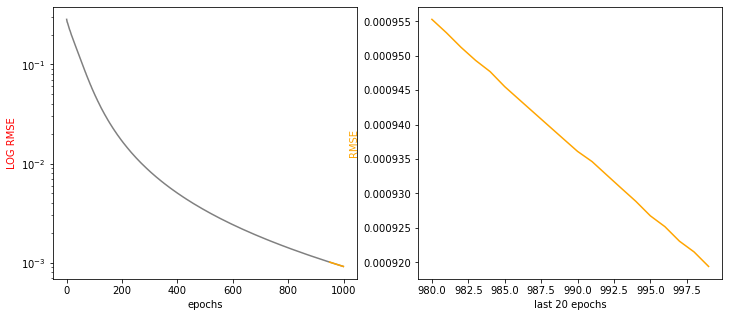

In [34]:
history_df = pd.DataFrame.from_dict(hist.history)
# sns.lineplot(data=history_df['root_mean_squared_error'])
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(history_df.loss, c = 'grey')
plt.plot(history_df.loss[-50:], c = 'orange')
plt.yscale('log')
plt.xlabel("epochs")
plt.ylabel("LOG RMSE", c='r');
plt.subplot(122)
plt.plot(history_df.loss[-20:], c='orange')
# plt.yscale('log')
plt.xlabel("last 20 epochs")
plt.ylabel("RMSE", c='orange');


    MSE: 0.001 
   RMSE: 0.030


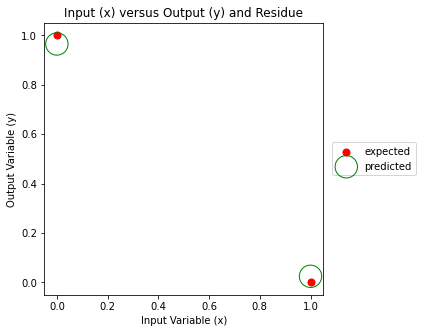

In [35]:
# make predictions for the input data
y_pred = my_model.predict(xy.x)
xy_pred = pd.DataFrame({'x': xy.x, 'y': xy.y, 'y_pred':y_pred.reshape(y_pred.shape[0],)})


#mse = ((xy_pred['y_pred']-y_mod)**2).mean()
mse = mean_squared_error(xy_pred['y'], xy_pred['y_pred'])
print('\n    MSE: %.3f' % mse, '\n   RMSE: %.3f' % mse**0.5)

x_plot = xy_pred.x
y_plot = xy_pred.y
y_pred_plot = xy_pred.y_pred 

plt.figure(figsize=(5,5))

plt.scatter(x_plot, y_plot , label='expected', s = 50, marker = 'o', c = 'r')
plt.scatter(x_plot,y_pred_plot , label='predicted', marker = 'o', color = 'g', facecolor = 'none', s = 500)
plt.title('Input (x) versus Output (y) and Residue')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend(loc='center', bbox_to_anchor = (1.182, 0.5))
plt.show()

## to see what happen during the training, let's make some loops

In [36]:
def test_epoch(x, y, ep, ini, sc = 0):
    hist = my_model.fit(x, y, epochs = ep, initial_epoch = ini, batch_size = 32, verbose = 0);
    history_df = (pd.DataFrame.from_dict(hist.history))
    return history_df


In [67]:
def mygraph(nloop, epo, full_hist, xywbl_hist):
    plt.figure(figsize=(12, 12))
    plt.subplot(221)
    plt.plot(full_hist.loss)
    plt.plot(full_hist[-epo:].loss, c='lime')
    plt.yscale('log')
    plt.xlim(1,)
    plt.xlabel("epochs")
    plt.ylabel("LOG RMSE")
    plt.title('LOSS, total epochs=' + str(len(full_hist)) + '/' + str(pr+(nloop)*epo))
    plt.subplot(222)
    plt.scatter(x_plot, y_plot, label='original', marker = 'x', s = 500)
    plt.scatter(x_plot, y_pred_plot, label='Predicted', marker = 'o', color = 'r', facecolor = 'none', s = 500)
    plt.annotate('' + str(round(y_pred_plot[0],3)), xy = [0.025, y_pred_plot[0]-0.025], size = 20, c = 'r')
    plt.annotate('' + str(round(y_pred_plot[1],3)), xy = [0.975, y_pred_plot[1]-0.025], size = 20, ha = 'right', c = 'r')
    n_w = my_model.get_weights()[0][0][0]
    n_b = my_model.get_weights()[1][0]
    plt.annotate('w:' + str(round(n_w,3)) + '\nb:' + str(round(n_b,3)),xy = [0.5, 0.5], size = 20, c='b')    
    plt.xlabel('Input Variable (x)')
    plt.title('original/predict')
    plt.legend(fontsize = 15)
    plt.ylim(-0.1,1.1)
    plt.xlim(-0.1,1.1)
    plt.subplot(223)
    plt.plot(xywbl_hist[['w', 'b']])
#     plt.annotate(str(round(full_hist.loss[-1:].values[0],3)), xy=[0.25,0.25], xycoords='figure fraction', size = 20)#[full_hist[-epo:].loss[0],full_hist[-epo:].loss[1]])
    plt.xlim(1,)
    plt.xlabel("epochs")
    plt.ylabel("weight and bias values")
    plt.title('W and B')
    plt.legend(['w','b'], fontsize = 15)
    plt.subplot(224)
    plt.plot(xywbl_hist[['x0', 'x1']])
    plt.xlim(1,)
    plt.legend(['x0_pred','x1_pred'], fontsize = 15)
    rm = 'MSE:' + str(round(mse,2)) + '\nRMSE:'+str(round(mse**0.5,2))+'\nMAE:'+str(round(mae,2))

    plt.tight_layout();
    display.display(plt.gcf())
    plt.close()
    display.clear_output(wait=True)
    return

In [59]:
#reset model and train with ep=N step
ep = 0
my_model = nn_model()
loss0 = np.mean((neur1_val(my_model, 0, 1, 1, 0)[4]))
mae0 = np.mean(abs(neur1_val(my_model, 0, 1, 1, 0 )[3]-neur1_val(my_model, 0, 1, 1, 0)[5]))
full_hist = pd.DataFrame([[loss0, loss0, mae0, 100]],columns=['loss', 'mean_squared_error', 'mean_absolute_error',
       'mean_absolute_percentage_error'])
full_hist = full_hist.append(test_epoch(xy.x, xy.y, ep = ep, ini = 0)).reset_index(drop = True)
xy_plot_hist = pd.DataFrame(xy.x)
xy_plot_hist['0'] = xy.x * 0
y_pred_hist = pd.DataFrame([neur1_val(my_model, 0, 1, 1, 0)[3]])
xywbl_hist = pd.DataFrame([[neur1_val(my_model, 1, 0, 0, 1)[3][1],neur1_val(my_model, 1, 0, 0, 1)[3][0],neur1_val(my_model, 1, 0, 0, 1)[1][0],neur1_val(my_model, 1, 0, 0, 1)[1][1],loss0]], columns=['x0','x1','w', 'b', 'l'])

In [60]:
#print xy, to check input(=x) and output(=y)
xy

,x,y
0,0,1
1,1,0


In [61]:
#check the fit history.
full_hist

,loss,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
0,0.15351,0.15351,0.369394,100


In [62]:
#dataframe with full history of output, weight, bias and loss
xywbl_hist

,x0,x1,w,b,l
0,0.5,0.238788,-1.159336,0.0,0.15351


In [63]:
neur1_val(my_model, 0, 1, 1, 0, 1)

[x1,x0] [w, b] [z0, z1] [g(z0), g(z1)] mse


(array([0, 1]),
 array([-1.1593361,  0.       ], dtype=float32),
 array([ 0.        , -1.15933609]),
 array([0.5       , 0.23878794]),
 0.15350984061709516,
 array([1, 0]))

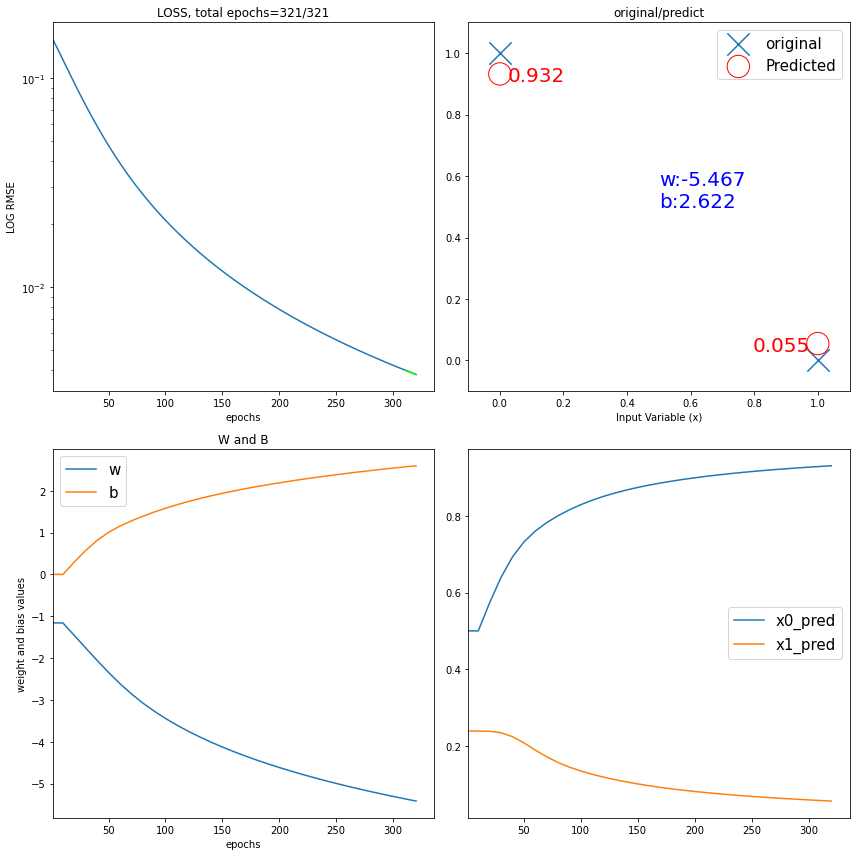

In [68]:
#design a loop to have a dynamic view
nloop = 10
epo = 10
pr = len(full_hist)
fh = xy_plot_hist.shape[1]

for i in range (0, nloop + 1):
    y_pred = my_model.predict(xy.x, verbose = 0)
    xy_pred = pd.DataFrame({'x': xy.x, 'y': xy.y, 'y_pred':y_pred.reshape(y_pred.shape[0],)})
    x_plot = xy_pred.x
    y_plot = xy_pred.y
    y_pred_plot = xy_pred.y_pred
    xy_plot_hist[str(i+fh-1)] = y_pred_plot
    mse = mean_squared_error(xy_pred['y'], xy_pred['y_pred'])
    mae = mean_absolute_error(xy_pred['y'], xy_pred['y_pred'])

    mygraph(nloop, epo, full_hist, xywbl_hist)
    n_w = my_model.get_weights()[0][0][0]
    n_b = my_model.get_weights()[1][0]
 
    full_hist = full_hist.append(test_epoch(xy.x, xy.y, epo, 0)).reset_index(drop=True)    
    y_pred_hist = y_pred_hist.append(y_pred_plot).reset_index(drop=True)
    xywbl_hist = xywbl_hist.append({'x0':y_pred[0][0], 'x1':y_pred[1][0],'w':n_w, 'b':n_b,'l':full_hist.loss[-1:].values[0]}, ignore_index = True)
    xywbl_hist.index = xywbl_hist.index * epo

# possible to run this cell several times. nloop and epo can be modified.

In [65]:
mse = mean_squared_error(xy_pred['y'], xy_pred['y_pred'])
mae = mean_absolute_error(xy_pred['y'], xy_pred['y_pred'])
print('\n    MSE: %.3f' % mse, '\n   RMSE: %.3f' % mse**0.5, '\n    MAE: %.3f' % mae)


    MSE: 0.021 
   RMSE: 0.144 
    MAE: 0.143


In [ ]:
x_test = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.scatter(x_test, my_model.predict(x_test).reshape(-1,))
plt.ylim(0,1);